This code is modification proposed by Alessia Paccagnini

**Say Wonderful Things: A Sentiment Analysis of Eurovision Lyrics

This code replicates the exercise proposed by AlanFrancisWise (https://towardsdatascience.com/say-wonderful-things-a-sentiment-analysis-of-eurovision-lyrics-700d9bde1e9d)

https://colab.research.google.com/drive/1EPblF4GMse6MrSTOjny2p_cYt39tw_0B?usp=sharing#scrollTo=zKvtoq9u80DB



First import useful packages and libraries
Pandas and Numpy for data analysis.
Re and String for data cleaning.
Matplotlib and Wordcloud to plot nice graphs.
NLTK for Sentiment Analysis, Tokenization, and Lemmatization.
Sklearn to count words frequency.
Lyricsgenius to extract the data of lyrics.
Genius Credentials to access their Apis and Data acquisition (click here for more info).

In [2]:
import lyricsgenius as genius
import pandas as pd
import string 
import numpy as np

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from wordcloud import WordCloud
#nltk.download('stopwords')
#nltk.download('wordnet')  

In [8]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np

#Statistics
from scipy.stats import iqr
from sklearn.neighbors import KernelDensity
from statsmodels.tsa.arima.model import ARIMA
import statsmodels as sm
from scipy.stats import sem
from pmdarima.arima import auto_arima

#Plotting
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer

#To create the sentiment analysis model, tokenization and stop words
import nltk
from textblob import TextBlob
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

#Genius API
from lyricsgenius import Genius
genius_token = "Your_Genius_Token"
genius = Genius(genius_token)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Download the dataset from https://www.kaggle.com/minitree/eurovision-song-lyrics and save it in the current directory

**LOAD DATA**

In [10]:
df = pd.read_json("eurovision-lyrics.json").transpose()
df = df.set_index("#")
df

Country #.1                  Artist  \
#                                                  
1        Netherlands   1             Jetty Paerl   
2        Switzerland   1               Lys Assia   
3            Belgium   1             Fud Leclerc   
4     Germany (West)   1  Walter Andreas Schwarz   
5             France   1            Mathé Altéry   
...              ...  ..                     ...   
1640             NaN   -                   Tusse   
1641             NaN   -            Gjon's Tears   
1642             NaN   -          Jeangu Macrooy   
1643             NaN   -                    Go_A   
1644             NaN   -            James Newman   

                                 Song              Language Pl. Sc.  \
#                                                                     
1               De vogels van Holland                 Dutch   -   -   
2                  Das alte Karussell                German   -   -   
3     Messieurs les noyés de la Seine                French   -   -   
4       Im Wartesaal zum großen Glück                German   -   -   
5                      Le temps perdu                French   -   -   
...                               ...                   ...  ..  ..   
1640                           Voices               English   -   -   
1641                   Tout l'Univers                French   -   -   
1642               Birth Of A New Age  English/Sranan Tongo   -   -   
1643                             Shum             Ukrainian   -   -   
1644                           Embers               English   -   -   

     Eurovision_Number  Year     Host_Country  Host_City  \
#                                                          
1                    1  1956      Switzerland     Lugano   
2                    1  1956      Switzerland     Lugano   
3                    1  1956      Switzerland     Lugano   
4                    1  1956      Switzerland     Lugano   
5                    1  1956      Switzerland     Lugano   
...                ...   ...              ...        ...   
1640                65  2021  The Netherlands  Rotterdam   
1641                65  2021  The Netherlands  Rotterdam   
1642                65  2021  The Netherlands  Rotterdam   
1643                65  2021  The Netherlands  Rotterdam   
1644                65  2021  The Netherlands  Rotterdam   

                                                 Lyrics  \
#                                                         
1     De vogels van Holland zijn zo muzikaal\nZe ler...   
2     Das alte Karussell\nDas geht nicht mehr so sch...   
3     Messieurs les noyés de la Seine\nOuvrez-moi le...   
4     Es gibt einen Hafen\nDa fährt kaum ein Schiff\...   
5     Chante, carillon\nLe chant du temps perdu\nCha...   
...                                                 ...   
1640  There’s fire in the rain\nBut we’ll get up aga...   
1641  Laisser le vent qui frôle\nSa main sur mon épa...   
1642  Skin as rich as a starlit night\nYour rhythm i...   
1643  Весняночка, весняночка,\nДе ти зимувала?\nУ са...   
1644  Sometimes I know\nMy fire burns low\nBut as lo...   

                                     Lyrics translation  
#                                                        
1     The birds of Holland are so musical\nThey alre...  
2     The old carousel\nIt doesn't go as fast anymor...  
3     Ye drowned men of the river Seine (1)\nOpen th...  
4     There is a harbour\nWhere hardly any ship leav...  
5     Sing, carillon\nThe song of lost time\nSing yo...  
...                                                 ...  
1640                                            English  
1641  Let the wind brush\nHis/her hand over my shoul...  
1642                                            English  
1643  Oh Spring song, Spring song\nWhere have you sp...  
1644                                            English  

[1644 rows x 13 columns]

**INITIAL EXPLORATORY ANALYSIS**
Clean lyrics

In the next cell we import other useful packages and in addition the helpers.py package (from def clean_lyrics)
Script Helpers.py that stores the functions used to extract, clean, and transform the data (this script was created by Cristóbal Veas, and is located on his GitHub repository https://github.com/cristobalvch/Music-Lyrics-NLP)

In [11]:
def clean_lyrics(df,column):
    """
    This function cleans the words without importance and fix the format of the  dataframe's column lyrics 
    parameters:
    df = dataframe
    column = name of the column to clean
    """
    df = df
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
    df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo","")
    df[column] = df[column].str.replace("\n"," ").str.replace(r"[^\w\d'\s]+","").str.replace("efil ym fo flah","")
    df[column] = df[column].str.strip()

    return df

def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word
    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

def create_decades(df):
    """
    This function creates a new column called decades used to group the songs and lyrics by decade based on the date released 
    for each song
    parameters:
    df = dataframe
    """
    decades = []

    for year in df['Year']:
        if 1950 <= int(year) < 1960:
            decades.append("50s")
        if 1960 <= int(year) < 1970:
            decades.append("60s")
        if 1970 <= int(year) < 1980:
            decades.append("70s")
        if 1980 <= int(year) < 1990:
            decades.append("80s")
        if 1990 <= int(year) < 2000:
            decades.append("90s")
        if 2000 <= int(year) < 2010:
            decades.append("00s")
        if 2010 <= int(year) :
            decades.append("10s")
    df['Decade'] = decades
    df = df[['Country','#.1','Artist','Song','Language','Pl.','Sc.', 'Eurovision_Number', 'Year', 'Decade', 'Host_Country', 'Host_City', 'Lyrics', 'Lyrics translation']]
    return df

def unique(list1):
   # intilize a null list
     unique_list = []
   # traverse for all elements
     for x in list1:
         # check if exists in unique_list or not
         if x not in unique_list:
              unique_list.append(x)
     return unique_list

def word_stats(df_list, main_df):
  unique_words = []
  total_words =  []
  total_news = []
  years = []

  for decade_df in df_list:
    for value in decade_df.columns[1:]:
      unique_words.append(np.count_nonzero(decade_df[value]))
      total_words.append(sum(decade_df[value].tolist()))
      years.append(str(value))
      total_news.append(main_df['Decade'][main_df['Decade']==value].count())
  data = pd.DataFrame({'decade':years, 'unique words':unique_words,'total words':total_words,'total songs':total_news})
  data['words per songs'] = round(data['total words'] / data['total songs'],0)
  data['words per songs'] = data['words per songs'].astype('int')
  return data 

In [12]:
df = clean_lyrics(df, "Lyrics")
df = clean_lyrics(df, "Lyrics translation")

Add a column of decades

In [13]:
df= df[df['Lyrics'].notnull()]
df = df[df['Lyrics translation'].notnull()]
df = create_decades(df)

Add a column with unique words per song

In [14]:
#Stores unique words of each lyrics song into a new column called words
#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df = df.reset_index(drop=True)
for word in df['Lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
#create the new column with the information of words lists
df['words'] = words
df.head()

Country #.1                  Artist  \
0     Netherlands   1             Jetty Paerl   
1     Switzerland   1               Lys Assia   
2         Belgium   1             Fud Leclerc   
3  Germany (West)   1  Walter Andreas Schwarz   
4          France   1            Mathé Altéry   

                              Song Language Pl. Sc. Eurovision_Number  Year  \
0            De vogels van Holland    Dutch   -   -                 1  1956   
1               Das alte Karussell   German   -   -                 1  1956   
2  Messieurs les noyés de la Seine   French   -   -                 1  1956   
3    Im Wartesaal zum großen Glück   German   -   -                 1  1956   
4                   Le temps perdu   French   -   -                 1  1956   

  Decade Host_Country Host_City  \
0    50s  Switzerland    Lugano   
1    50s  Switzerland    Lugano   
2    50s  Switzerland    Lugano   
3    50s  Switzerland    Lugano   
4    50s  Switzerland    Lugano   

                                              Lyrics  \
0  de vogels van holland zijn zo muzikaal ze lere...   
1  das alte karussell das geht nicht mehr so schn...   
2  messieurs les noyés de la seine ouvrezmoi les ...   
3  es gibt einen hafen da fährt kaum ein schiff u...   
4  chante carillon le chant du temps perdu chante...   

                                  Lyrics translation  \
0  the birds of holland are so musical they alrea...   
1  the old carousel it doesn't go as fast anymore...   
2  ye drowned men of the river seine  open the wa...   
3  there is a harbour where hardly any ship leave...   
4  sing carillon the song of lost time sing your ...   

                                               words  
0  [de, vogels, van, holland, zijn, zo, muzikaal,...  
1  [da, alte, karussell, geht, nicht, mehr, schne...  
2  [monsieur, le, noyés, de, la, seine, ouvrezmoi...  
3  [e, gibt, einen, hafen, da, fährt, kaum, ein, ...  
4  [chante, carillon, le, chant, du, temp, perdu,...

**Word Frequency Analysis**

List of stop word languages

In [60]:
languages = ['english', 'german', 'spanish', 'french', 'dutch', 'italian', 'danish', 'swedish', 'finnish', 'slovene', 'greek', 'turkish', 'arabic', 'romanian', 'hungarian', 'russian']

Find frequency of words per decade

In [61]:
#Create a list of stop words of all languages included in nltk package.
stop_words = []
for language in languages:
  stop_words.extend(stopwords.words(language))
stop_words.extend(["oh", "cest"]) #These words appear a lot but don't add any meaning

#Split the dataset into decades
decades = ['50s', '60s', '70s', '80s', '90s', '00s', '10s']
df_decade_list = []
for decade in decades:
  df_decade_list.append(df[df['Decade'] == decade])

#Create a data_frame of words used per decade
df_word_list = [] 
for decade_df, decade_choice in zip(df_decade_list, decades):
  set_words = []
  set_decades = []
  for i in decade_df.index:
    for word in decade_df['words'].loc[i]:
      if word == 'lamour':
        set_words.append('amour') #replace l'amour with amour
      else:
        set_words.append(word)
      set_decades.append(decade_df['Decade'].loc[i])
  words_df = pd.DataFrame({'words':set_words, 'decade':set_decades})

#Count the word frequencies per decade and place them into a list of datasets per decade
  cv = CountVectorizer(stop_words = stop_words)
  text_cv = cv.fit_transform(words_df['words'])
  data_cv = pd.DataFrame(text_cv.toarray(), columns=cv.get_feature_names())
  data_cv['decade'] = words_df['decade']
  vect_words = data_cv.groupby('decade').sum().T
  vect_words = vect_words.reset_index(level=0).rename(columns = {'index':'words'})
  vect_words = vect_words.rename_axis(columns='')
  vect_words = vect_words[['words', decade_choice]]
  df_word_list.append(vect_words)

C:\Users\aless\anaconda3new\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['printr', 'δι', 'ἀλλ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [ ]:
#Create a list of stop words of all languages included in nltk package.
stop_words = []
for language in languages:
  stop_words.extend(stopwords.words(language))
stop_words.extend(["oh", "cest"]) #These words appear a lot but don't add any meaning

#Split the dataset into decades
decades = ['50s', '60s', '70s', '80s', '90s', '00s', '10s']
df_decade_list = []
for decade in decades:
  df_decade_list.append(df[df['Decade'] == decade])

#Create a data_frame of words used per decade
df_word_list = [] 
for decade_df, decade_choice in zip(df_decade_list, decades):
  set_words = []
  set_decades = []
  for i in decade_df.index:
    for word in decade_df['words'].loc[i]:
      if word == 'lamour':
        set_words.append('amour') #replace l'amour with amour
      else:
        set_words.append(word)
      set_decades.append(decade_df['Decade'].loc[i])
  words_df = pd.DataFrame({'words':set_words, 'decade':set_decades})

#Count the word frequencies per decade and place them into a list of datasets per decade
  cv = CountVectorizer(stop_words = stop_words)
  text_cv = cv.fit_transform(words_df['words'])
  data_cv = pd.DataFrame(text_cv.toarray(), columns=cv.get_feature_names())
  data_cv['decade'] = words_df['decade']
  vect_words = data_cv.groupby('decade').sum().T
  vect_words = vect_words.reset_index(level=0).rename(columns = {'index':'words'})
  vect_words = vect_words.rename_axis(columns='')
  vect_words = vect_words[['words', decade_choice]]
  df_word_list.append(vect_words)

Print the most popular word per decade

In [62]:
for decade_choice, i in zip(decades, range(len(decades))):
  print("Most Popular Word of the {} is {}".format(decade_choice, df_word_list[i]['words'].iloc[df_word_list[i][decades[i]].idxmax()]))

Most Popular Word of the 50s is amour
Most Popular Word of the 60s is amour
Most Popular Word of the 70s is amour
Most Popular Word of the 80s is vie
Most Popular Word of the 90s is love
Most Popular Word of the 00s is love
Most Popular Word of the 10s is love


Function to print wordcloud

In [20]:
def plot_wordcloud(df):
  wc = WordCloud(background_color="white",colormap="Dark2", max_font_size=100,random_state=15)
  fig = plt.figure(figsize=(20,10))
  for index, value in enumerate(df.columns[1:]):
    top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
    wc.generate_from_frequencies(top_dict)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{value}",fontsize=15)
  plt.show()

Plot the wordcloud for each decade

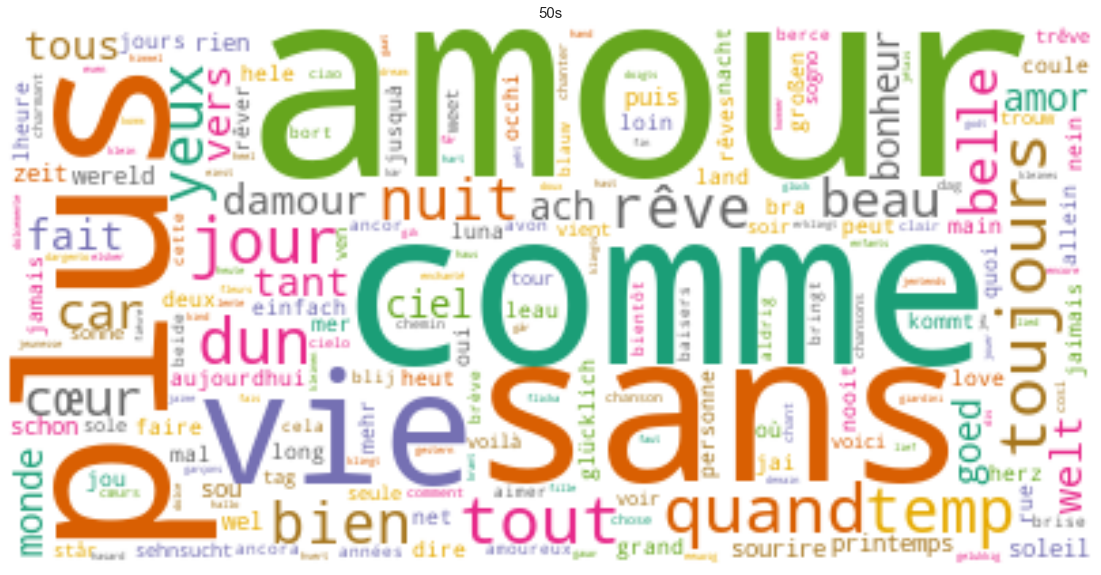

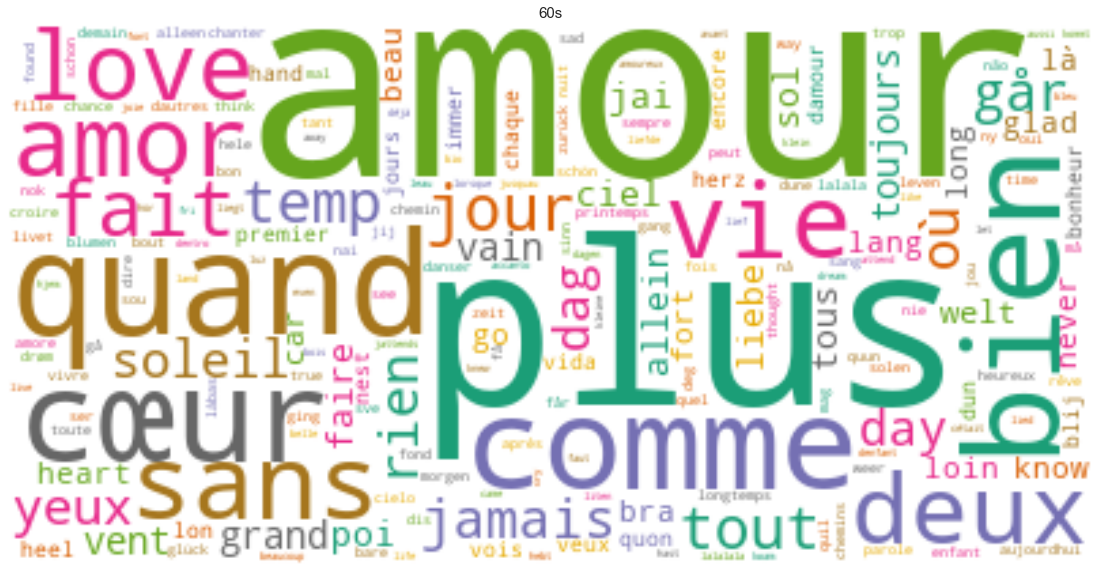

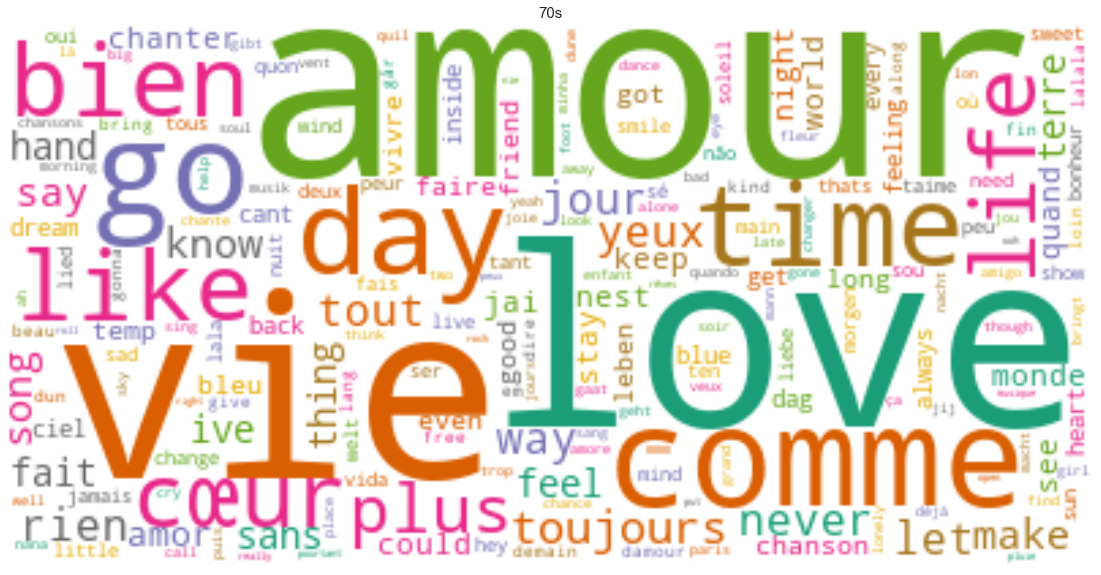

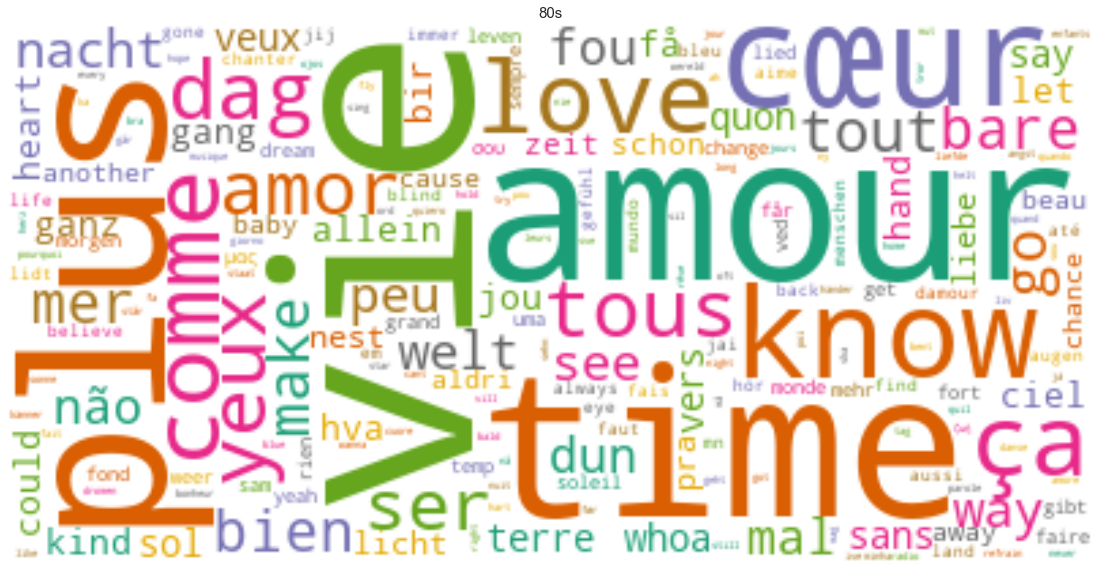

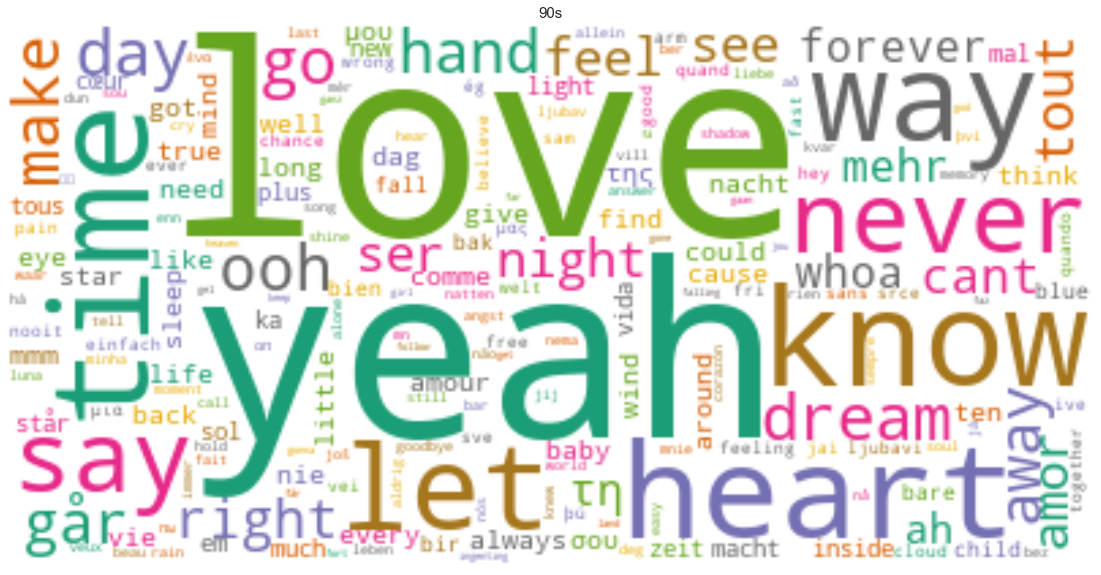

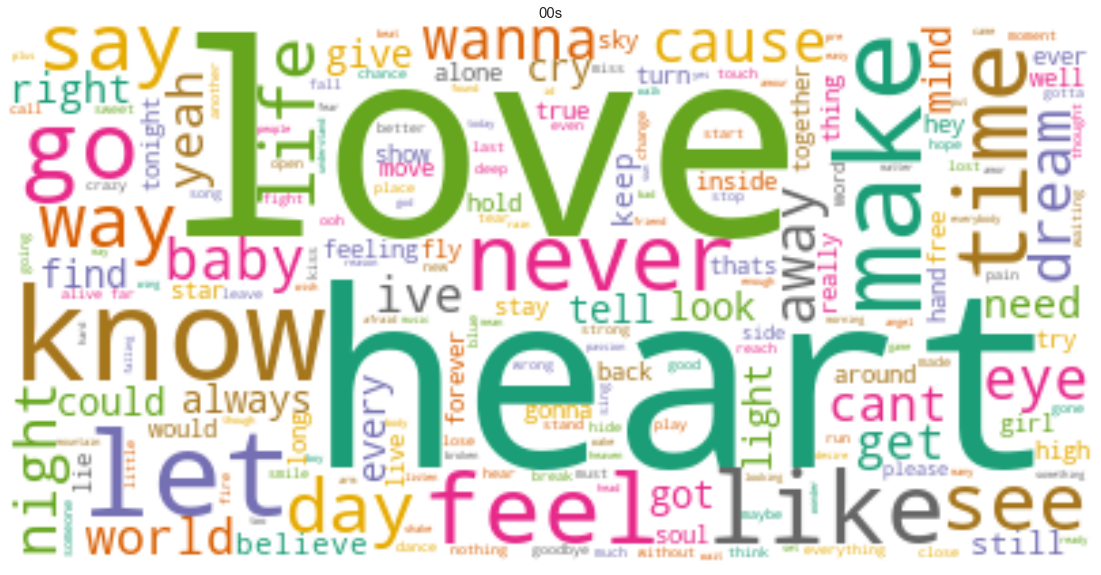

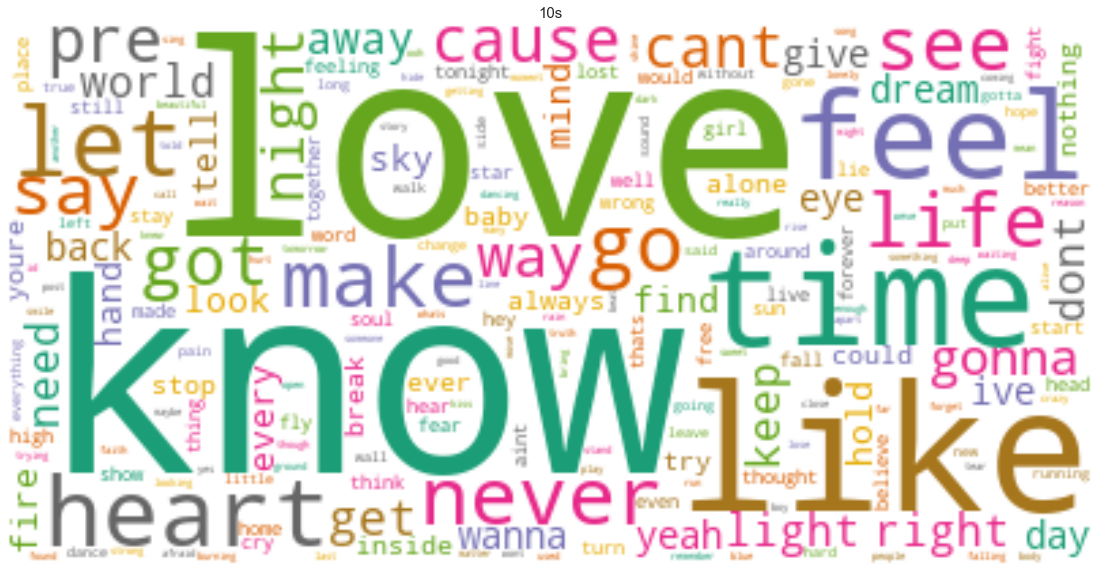

In [21]:
plot_wordcloud(df_word_list[0])
plot_wordcloud(df_word_list[1])
plot_wordcloud(df_word_list[2])
plot_wordcloud(df_word_list[3])
plot_wordcloud(df_word_list[4])
plot_wordcloud(df_word_list[5])
plot_wordcloud(df_word_list[6])

Function to print the word statistics for each decade.

In [63]:
def word_stats(df_list, main_df):
  unique_words = []
  total_words =  []
  total_news = []
  years = []

  for decade_df in df_list:
    if Pl.==1
    for value in decade_df.columns[1:]:
      unique_words.append(np.count_nonzero(decade_df[value]))
      total_words.append(sum(decade_df[value].tolist()))
      years.append(str(value))
      total_news.append(main_df['Decade'][main_df['Decade']==value].count())
  data = pd.DataFrame({'decade':years, 'unique words':unique_words,'total words':total_words,'total songs':total_news})
  data['words per songs'] = round(data['total words'] / data['total songs'],0)
  data['words per songs'] = data['words per songs'].astype('int')
  return data

SyntaxError: invalid syntax (<ipython-input-63-55f90a3e7a24>, line 8)

In [65]:
print(Pl.)

SyntaxError: invalid syntax (<ipython-input-65-2099e9151f64>, line 1)

Run the word_stats function

In [23]:
word_stats(df_word_list, df)

decade  unique words  total words  total songs  words per songs
0    50s          1890         2397           45               53
1    60s          5039         7382          163               45
2    70s          6124         9164          176               52
3    80s          7050        10087          200               50
4    90s          8610        12231          236               52
5    00s          7344        17039          336               51
6    10s          9035        25244          488               52

**SENTIMENT ANALYSIS

Create text blob objects and append the sentiment to end of the dataframe

In [24]:
#Create lists to store the different scores for each set of lyrics
sentiment = []
#Iterate for each row of lyrics and append the scores
for i in df.index:
  #Create text blobs for each of the song lyrics
  if df['Lyrics translation'].iloc[i] == "english":
    blob=TextBlob(df['Lyrics'].iloc[i])
  else:
    blob=TextBlob(df['Lyrics translation'].iloc[i])
  sentiment.append(blob.sentiment[0])
#Create a column for the sentiment score
df['sentiment'] = sentiment
df.head()

Country #.1                  Artist  \
0     Netherlands   1             Jetty Paerl   
1     Switzerland   1               Lys Assia   
2         Belgium   1             Fud Leclerc   
3  Germany (West)   1  Walter Andreas Schwarz   
4          France   1            Mathé Altéry   

                              Song Language Pl. Sc. Eurovision_Number  Year  \
0            De vogels van Holland    Dutch   -   -                 1  1956   
1               Das alte Karussell   German   -   -                 1  1956   
2  Messieurs les noyés de la Seine   French   -   -                 1  1956   
3    Im Wartesaal zum großen Glück   German   -   -                 1  1956   
4                   Le temps perdu   French   -   -                 1  1956   

  Decade Host_Country Host_City  \
0    50s  Switzerland    Lugano   
1    50s  Switzerland    Lugano   
2    50s  Switzerland    Lugano   
3    50s  Switzerland    Lugano   
4    50s  Switzerland    Lugano   

                                              Lyrics  \
0  de vogels van holland zijn zo muzikaal ze lere...   
1  das alte karussell das geht nicht mehr so schn...   
2  messieurs les noyés de la seine ouvrezmoi les ...   
3  es gibt einen hafen da fährt kaum ein schiff u...   
4  chante carillon le chant du temps perdu chante...   

                                  Lyrics translation  \
0  the birds of holland are so musical they alrea...   
1  the old carousel it doesn't go as fast anymore...   
2  ye drowned men of the river seine  open the wa...   
3  there is a harbour where hardly any ship leave...   
4  sing carillon the song of lost time sing your ...   

                                               words  sentiment  
0  [de, vogels, van, holland, zijn, zo, muzikaal,...   0.138021  
1  [da, alte, karussell, geht, nicht, mehr, schne...   0.059755  
2  [monsieur, le, noyés, de, la, seine, ouvrezmoi...  -0.027151  
3  [e, gibt, einen, hafen, da, fährt, kaum, ein, ...   0.184144  
4  [chante, carillon, le, chant, du, temp, perdu,...   0.310317

In [31]:
df.to_csv("Eurovision.csv")

Create a histogram of sentiments

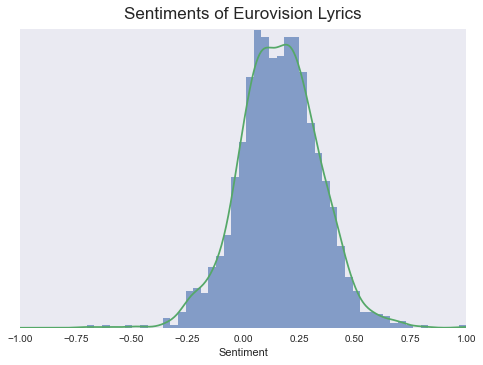

In [25]:
fig, ax = plt.subplots()

#define histograms and kde
df["sentiment"].plot(kind="hist", density=True, bins=50, alpha=0.65)
df["sentiment"].plot(kind="kde")

#Appearance settings
ax.set_xlabel("Sentiment")
ax.set_xlim(-1, 1)
ax.set_ylim(0,2.3)
ax.set_yticks([])
ax.set_ylabel("")
ax.set_title("Sentiments of Eurovision Lyrics", size=17, pad=10)
ax.tick_params(left=False, bottom=False)
plt.style.use("bmh")
ax.grid(False)
for ax, spine in ax.spines.items():
  spine.set_visible(False)


plt.show()

Split the dataframe into a separate dataframe with decades

In [26]:
df_decade = []
for d in decades:
  df_decade.append(df[df['Decade'] == d])

KDE plot for each decade

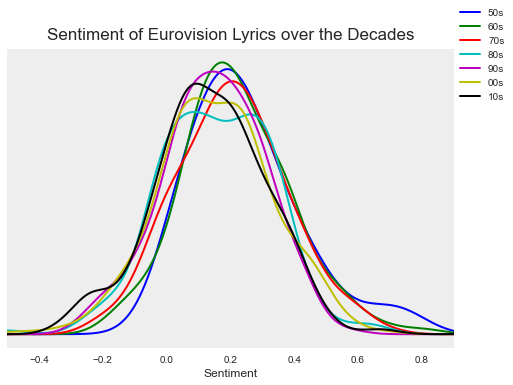

In [27]:
fig, ax = plt.subplots()
colors = "bgrcmyk"
#Print a KDE for each decade
for data, decade_c, c in zip(df_decade, decades, colors):
  data["sentiment"].plot(kind="kde", c=c, label=decade_c)
#Appearance settings
ax.set_xlabel("Sentiment")
ax.set_xlim(-0.5, 0.9)
ax.grid(False)
ax.set_xlabel("Sentiment")
ax.set_yticks([])
ax.set_ylabel("")
ax.set_title("Sentiment of Eurovision Lyrics over the Decades", size=17, pad=10)
plt.style.use("bmh")
for ax, spine in ax.spines.items():
  spine.set_visible(False)
fig.legend()
plt.show()

Confidence interval plot

The mean for the 50s is: 0.25
The CI for the 50s is: [0.196, 0.298]
The mean for the 60s is: 0.22
The CI for the 60s is: [0.195, 0.247]
The mean for the 70s is: 0.2
The CI for the 70s is: [0.178, 0.229]
The mean for the 80s is: 0.16
The CI for the 80s is: [0.132, 0.18]
The mean for the 90s is: 0.15
The CI for the 90s is: [0.127, 0.167]
The mean for the 00s is: 0.15
The CI for the 00s is: [0.13, 0.17]
The mean for the 10s is: 0.14
The CI for the 10s is: [0.121, 0.153]
['50s', '60s', '70s', '80s', '90s', '00s', '10s']


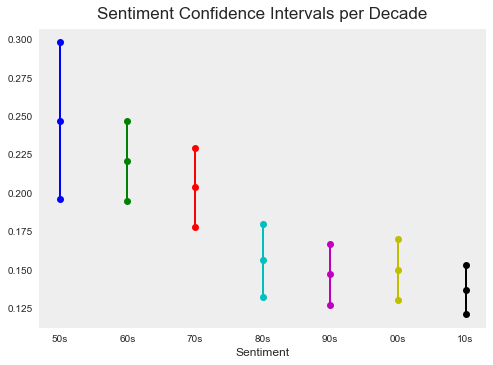

In [28]:
#Find means and confidence intervals for each decade
CIs = []
means = []
for data in df_decade:
  means.append(np.mean(data['sentiment']))
  CIs.append([round(np.mean(data['sentiment'])-1.96*sem(data['sentiment']),3), round(np.mean(data['sentiment'])+1.96*sem(data['sentiment']),3)])

#Print these
for d, c, m in zip(decades,CIs,means):
  print("The mean for the {} is: {}".format(d,round(m,2)))
  print("The CI for the {} is: {}".format(d, c))

#Create a dictionary to help plotting
ci_dict = {}
ci_dict['decades'] = decades
ci_dict['lower'] = [a[0] for a in CIs]
ci_dict['mean'] = means
ci_dict['upper'] = [a[1] for a in CIs]

#Plotting
ci_df = pd.DataFrame(ci_dict)
fig, ax = plt.subplots()
for lower,mean, upper,y,c in zip(ci_df['lower'], ci_df['mean'], ci_df['upper'],range(len(ci_df)), colors):
    ax.plot((y,y,y), (lower,mean,upper),'ro-',color=c)
ax.set_xlabel("Sentiment")
ax.grid(False)
ax.set_title("Sentiment Confidence Intervals per Decade", size=17, pad=10)
ax.set_xticks(range(len(decades)))
ax.set_xticklabels(decades)
print(decades)
plt.show()

**HOW DOES 2020 LINE UP?

Scrape lyrics using Genius API and stick them in df_2020

In [45]:
Artist = ["The Mamas", "VAL", "Montaigne", "Vasil", "Ana Soklic", "The Roop", "Lesley Roy", "Little Big", "Hooverphonic", "Destiny", "Damir Kedzo", "Efendi", "Sandro", "Ulrikke", "Eden Alene", "Roxen", "Go_A", "Stefania", "Uku Suviste", "Vincent Bueno", "Natalia Gordienko", "Senhit", "Benny Cristo", "Hurricane", "Alicja", "Dadi Freyr", "Gjon's Tears", "Ben & Tan", "Arilena Ara", "Aksel", "Athena Manoukian", "Elisa", "Tornike Kipiani", "Victoria", "Samanta Tina", "Tom Leeb", "Ben Dolic", "Diodato", "Blas Canto", "James Newman", "Jeangu Macrooy"]
Song = ["Move", "Da vidna", "Don't Break Me", "You", "Voda", "On Fire", "Story of My Life", "Uno", "Release Me", "All of My Love", "Divlji vjetre", "Cleopatra", "Running", "Attention", "Feker libi", "Alcohol You", "Solovey", "SUPERG!RL", "What Love Is", "Alive", "Prison", "Freaky!", "Kemama", "Hasta la vista", "Empires", "Think About Things", "Repondez-moi", "Yes", "Fall from the sky", "Looking Back", "Chains on You", "Medo de sentir", "Take Me as I Am", "Tears Getting Sober", "Still Breathing", "Mon alliée", "Violent Thing", "Fai rumore", "Universo", "My Last Breath", "Grow"]
Lyrics = []
for a, s in zip(Artist, Song):
  song = genius.search_song(s, a)
  Lyrics.append(song.lyrics)

df_2020 = pd.DataFrame(Artist, columns = ["Artist"])
df_2020["Song"] = Song
df_2020["Lyrics"] = Lyrics
df_2020

Searching for "Move" by The Mamas...
Done.
Searching for "Da vidna" by VAL...
Done.
Searching for "Don't Break Me" by Montaigne...
Done.
Searching for "You" by Vasil...
Done.
Searching for "Voda" by Ana Soklic...
Done.
Searching for "On Fire" by The Roop...
Done.
Searching for "Story of My Life" by Lesley Roy...
Done.
Searching for "Uno" by Little Big...
Done.
Searching for "Release Me" by Hooverphonic...
Done.
Searching for "All of My Love" by Destiny...
Done.
Searching for "Divlji vjetre" by Damir Kedzo...
Done.
Searching for "Cleopatra" by Efendi...
Done.
Searching for "Running" by Sandro...
Done.
Searching for "Attention" by Ulrikke...
Done.
Searching for "Feker libi" by Eden Alene...
Done.
Searching for "Alcohol You" by Roxen...
Done.
Searching for "Solovey" by Go_A...
Done.
Searching for "SUPERG!RL" by Stefania...
Done.
Searching for "What Love Is" by Uku Suviste...
Done.
Searching for "Alive" by Vincent Bueno...
Done.
Searching for "Prison" by Natalia Gordienko...
Done.
Searchin

Artist                 Song  \
0           The Mamas                 Move   
1                 VAL             Da vidna   
2           Montaigne       Don't Break Me   
3               Vasil                  You   
4          Ana Soklic                 Voda   
5            The Roop              On Fire   
6          Lesley Roy     Story of My Life   
7          Little Big                  Uno   
8        Hooverphonic           Release Me   
9             Destiny       All of My Love   
10        Damir Kedzo        Divlji vjetre   
11             Efendi            Cleopatra   
12             Sandro              Running   
13            Ulrikke            Attention   
14         Eden Alene           Feker libi   
15              Roxen          Alcohol You   
16               Go_A              Solovey   
17           Stefania            SUPERG!RL   
18        Uku Suviste         What Love Is   
19      Vincent Bueno                Alive   
20  Natalia Gordienko               Prison   
21             Senhit              Freaky!   
22       Benny Cristo               Kemama   
23          Hurricane       Hasta la vista   
24             Alicja              Empires   
25         Dadi Freyr   Think About Things   
26       Gjon's Tears         Repondez-moi   
27          Ben & Tan                  Yes   
28        Arilena Ara    Fall from the sky   
29              Aksel         Looking Back   
30   Athena Manoukian        Chains on You   
31              Elisa       Medo de sentir   
32    Tornike Kipiani      Take Me as I Am   
33           Victoria  Tears Getting Sober   
34       Samanta Tina      Still Breathing   
35           Tom Leeb           Mon alliée   
36          Ben Dolic        Violent Thing   
37            Diodato           Fai rumore   
38         Blas Canto             Universo   
39       James Newman       My Last Breath   
40     Jeangu Macrooy                 Grow   

                                               Lyrics  
0   [Verse 1]\nWe try, we fight\nWe fall, it's alr...  
1   [Verse 1]\nЗаплятала восень ясну косамі ды рас...  
2   [Verse 1]\nI don't feel the same buzz when you...  
3   [Verse 1]\nHand on my hand\nFingertips trembli...  
4   Greva naprej\nV novi čas\nZbeživa od tu\nDaleč...  
5   [Verse 1]\nI'm a human, not a stone\nI can mak...  
6   [Verse 1]\nEverybody told me that I'd never be...  
7   [Verse 1: Sonya & Ilich]\nIt's gonna take more...  
8   [Chorus]\nRelease me\nDon't talk, go away\nRel...  
9   [Verse 1]\nNever had the heart to pray\nI neve...  
10  Jednom kad zaboraviš mi ime\nI krevet hladan p...  
11  [Verse 1]\nCleopatra was a queen like me\nJust...  
12  [Verse 1]\nI don't feel like talking, let me s...  
13  [Verse 1]\nI find myself longing for attention...  
14  [Intro]\nፍቅር ልቤ, እወድሃለሁ, ና ወደ እኔ, I love you\n...  
15  [Verse 1]\nThe sun is rising ink\nFor me it's ...  
16  [Verse 1]\nОй ходила я в долину\nПо червоную к...  
17  [Verse 1]\nKeep the phone booth, don't need a ...  
18  [Verse 1]\nHow mysterious this life can be\nFu...  
19  [Verse 1]\nShackled bones, around all these th...  
20  [Verse 1]\nI don't wanna feel you\nI don't wan...  
21  [Intro]\nSo, when you touch me, I feel your lo...  
22  [Intro]\nAy, Benny Cristo and Glowsticks\nSome...  
23  [Tekst pesme "Hasta La Vista"]\n\n[Strofa 1: K...  
24  [Verse 1]\nAshes to ashes, dust into dust\nI'l...  
25  [Intro]\nBaby, I can't wait to know\nBelieve m...  
26  [Verse 1]\nPourquoi la pluie\nEt les nuages au...  
27  [Verse 1: Ben, Tan]\nI was six feet under for ...  
28  [Verse 1]\nWords have cut me to the bone\nAnd ...  
29  [Verse 1]\nWe would fall asleep\nTalking 'bout...  
30  [Verse 1]\nI got it\nYou wanna take me to the ...  
31  [Letra de "Medo de sentir"]\n\n[Estrofe 1]\nQu...  
32  [Verse 1]\nHow do you want me to talk like an ...  
33  [Verse 1]\nGreat, feel my head is taking over ...  
34  [Intro]\nI will keep on going, I will keep on ...  
35  [Round 1: PoRich]\nI wanna thank y'all for com...  
36  [Verse

Clean the lyrics

In [46]:
df_2020 = clean_lyrics(df_2020, "Lyrics")
df_2020

Artist                 Song  \
0           The Mamas                 Move   
1                 VAL             Da vidna   
2           Montaigne       Don't Break Me   
3               Vasil                  You   
4          Ana Soklic                 Voda   
5            The Roop              On Fire   
6          Lesley Roy     Story of My Life   
7          Little Big                  Uno   
8        Hooverphonic           Release Me   
9             Destiny       All of My Love   
10        Damir Kedzo        Divlji vjetre   
11             Efendi            Cleopatra   
12             Sandro              Running   
13            Ulrikke            Attention   
14         Eden Alene           Feker libi   
15              Roxen          Alcohol You   
16               Go_A              Solovey   
17           Stefania            SUPERG!RL   
18        Uku Suviste         What Love Is   
19      Vincent Bueno                Alive   
20  Natalia Gordienko               Prison   
21             Senhit              Freaky!   
22       Benny Cristo               Kemama   
23          Hurricane       Hasta la vista   
24             Alicja              Empires   
25         Dadi Freyr   Think About Things   
26       Gjon's Tears         Repondez-moi   
27          Ben & Tan                  Yes   
28        Arilena Ara    Fall from the sky   
29              Aksel         Looking Back   
30   Athena Manoukian        Chains on You   
31              Elisa       Medo de sentir   
32    Tornike Kipiani      Take Me as I Am   
33           Victoria  Tears Getting Sober   
34       Samanta Tina      Still Breathing   
35           Tom Leeb           Mon alliée   
36          Ben Dolic        Violent Thing   
37            Diodato           Fai rumore   
38         Blas Canto             Universo   
39       James Newman       My Last Breath   
40     Jeangu Macrooy                 Grow   

                                               Lyrics  
0   we try we fight we fall it's alright that's li...  
1   заплятала восень ясну косамі ды распляла заплу...  
2   i don't feel the same buzz when your name come...  
3   hand on my hand fingertips trembling this feel...  
4   greva naprej v novi čas zbeživa od tu daleč st...  
5   i'm a human not a stone i can make a change an...  
6   everybody told me that i'd never be someone i'...  
7   sonya  ilich it's gonna take more than one mar...  
8   release me don't talk go away release me it's ...  
9   never had the heart to pray i never thought i'...  
10  jednom kad zaboraviš mi ime i krevet hladan po...  
11  cleopatra was a queen like me just like me yea...  
12  i don't feel like talking let me sit here alon...  
13  i find myself longing for attention i'm not my...  
14  ፍቅር ልቤ እወድሃለሁ ና ወደ እኔ i love you ፍቅር ልቤ እወድሃለሁ...  
15  the sun is rising ink for me it's hard to blin...  
16  ой ходила я в долину по червоную калину ой ход...  
17  keep the phone booth don't need a super car no...  
18  how mysterious this life can be full of beauti...  
19  shackled bones around all these thrones come s...  
20  i don't wanna feel you i don't wanna feel you ...  
21  so when you touch me i feel your love all over...  
22  ay benny cristo and glowsticks some of y'all a...  
23  tekst pesme hasta la vista  strofa  ksenija kn...  
24  ashes to ashes dust into dust i'll follow you ...  
25  baby i can't wait to know believe me i'll alwa...  
26  pourquoi la pluie et les nuages aussi et les n...  
27  ben tan i was six feet under for the one and o...  
28  words have cut me to the bone and my heart is ...  
29  we would fall asleep talking 'bout our dreams ...  
30  i got it you wanna take me to the party 'cause...  
31  letra de medo de sentir  estrofe  qual é a saí...  
32  how do you want me to talk like an englishman ...  
33  great feel my head is taking over me ten déjà ...  
34  i will keep on going i will keep on running ru...  
35  round  porich i wanna thank y'all for coming t...  
36  got th

Translate and non-english lyrics into english

In [49]:
#Create lists to store the different translations
Lyrics_Translation = []
#Initialize the model
#Iterate for each row of lyrics and append the scores
for i in df_2020.index:
  blob = TextBlob(df_2020['Lyrics'].iloc[i])
  try:
    translation = blob.translate(to='en')
  except:
    translation = df_2020['Lyrics'].iloc[i]
  Lyrics_Translation.append("".join(translation))
#Create 4 columns to the main data frame  for each score
df_2020['Lyrics translation'] = Lyrics_Translation
df_2020

Artist                 Song  \
0           The Mamas                 Move   
1                 VAL             Da vidna   
2           Montaigne       Don't Break Me   
3               Vasil                  You   
4          Ana Soklic                 Voda   
5            The Roop              On Fire   
6          Lesley Roy     Story of My Life   
7          Little Big                  Uno   
8        Hooverphonic           Release Me   
9             Destiny       All of My Love   
10        Damir Kedzo        Divlji vjetre   
11             Efendi            Cleopatra   
12             Sandro              Running   
13            Ulrikke            Attention   
14         Eden Alene           Feker libi   
15              Roxen          Alcohol You   
16               Go_A              Solovey   
17           Stefania            SUPERG!RL   
18        Uku Suviste         What Love Is   
19      Vincent Bueno                Alive   
20  Natalia Gordienko               Prison   
21             Senhit              Freaky!   
22       Benny Cristo               Kemama   
23          Hurricane       Hasta la vista   
24             Alicja              Empires   
25         Dadi Freyr   Think About Things   
26       Gjon's Tears         Repondez-moi   
27          Ben & Tan                  Yes   
28        Arilena Ara    Fall from the sky   
29              Aksel         Looking Back   
30   Athena Manoukian        Chains on You   
31              Elisa       Medo de sentir   
32    Tornike Kipiani      Take Me as I Am   
33           Victoria  Tears Getting Sober   
34       Samanta Tina      Still Breathing   
35           Tom Leeb           Mon alliée   
36          Ben Dolic        Violent Thing   
37            Diodato           Fai rumore   
38         Blas Canto             Universo   
39       James Newman       My Last Breath   
40     Jeangu Macrooy                 Grow   

                                               Lyrics  \
0   we try we fight we fall it's alright that's li...   
1   заплятала восень ясну косамі ды распляла заплу...   
2   i don't feel the same buzz when your name come...   
3   hand on my hand fingertips trembling this feel...   
4   greva naprej v novi čas zbeživa od tu daleč st...   
5   i'm a human not a stone i can make a change an...   
6   everybody told me that i'd never be someone i'...   
7   sonya  ilich it's gonna take more than one mar...   
8   release me don't talk go away release me it's ...   
9   never had the heart to pray i never thought i'...   
10  jednom kad zaboraviš mi ime i krevet hladan po...   
11  cleopatra was a queen like me just like me yea...   
12  i don't feel like talking let me sit here alon...   
13  i find myself longing for attention i'm not my...   
14  ፍቅር ልቤ እወድሃለሁ ና ወደ እኔ i love you ፍቅር ልቤ እወድሃለሁ...   
15  the sun is rising ink for me it's hard to blin...   
16  ой ходила я в долину по червоную калину ой ход...   
17  keep the phone booth don't need a super car no...   
18  how mysterious this life can be full of beauti...   
19  shackled bones around all these thrones come s...   
20  i don't wanna feel you i don't wanna feel you ...   
21  so when you touch me i feel your love all over...   
22  ay benny cristo and glowsticks some of y'all a...   
23  tekst pesme hasta la vista  strofa  ksenija kn...   
24  ashes to ashes dust into dust i'll follow you ...   
25  baby i can't wait to know believe me i'll alwa...   
26  pourquoi la pluie et les nuages aussi et les n...   
27  ben tan i was six feet under for the one and o...   
28  words have cut me to the bone and my heart is ...   
29  we would fall asleep talking 'bout our dreams ...   
30  i got it you wanna take me to the party 'cause...   
31  letra de medo de sentir  estrofe  qual é a saí...   
32  how do you want me to talk like an englishman ...   
33  great feel my head is taking over me ten déjà ...   
34  i will keep on going i will keep on running ru...   
35  round  porich i wanna than

Sentiment analysis of 2020

In [50]:
#Create lists to store the different scores for each word
sentiment = []
#Initialize the model
#Iterate for each row of lyrics and append the scores
for i in df_2020.index:
  blob = TextBlob(df_2020['Lyrics translation'].iloc[i])
  sentiment.append(blob.sentiment[0])
#Create a column to the main data frame for each score
df_2020['sentiment'] = sentiment
df_2020

Artist                 Song  \
0           The Mamas                 Move   
1                 VAL             Da vidna   
2           Montaigne       Don't Break Me   
3               Vasil                  You   
4          Ana Soklic                 Voda   
5            The Roop              On Fire   
6          Lesley Roy     Story of My Life   
7          Little Big                  Uno   
8        Hooverphonic           Release Me   
9             Destiny       All of My Love   
10        Damir Kedzo        Divlji vjetre   
11             Efendi            Cleopatra   
12             Sandro              Running   
13            Ulrikke            Attention   
14         Eden Alene           Feker libi   
15              Roxen          Alcohol You   
16               Go_A              Solovey   
17           Stefania            SUPERG!RL   
18        Uku Suviste         What Love Is   
19      Vincent Bueno                Alive   
20  Natalia Gordienko               Prison   
21             Senhit              Freaky!   
22       Benny Cristo               Kemama   
23          Hurricane       Hasta la vista   
24             Alicja              Empires   
25         Dadi Freyr   Think About Things   
26       Gjon's Tears         Repondez-moi   
27          Ben & Tan                  Yes   
28        Arilena Ara    Fall from the sky   
29              Aksel         Looking Back   
30   Athena Manoukian        Chains on You   
31              Elisa       Medo de sentir   
32    Tornike Kipiani      Take Me as I Am   
33           Victoria  Tears Getting Sober   
34       Samanta Tina      Still Breathing   
35           Tom Leeb           Mon alliée   
36          Ben Dolic        Violent Thing   
37            Diodato           Fai rumore   
38         Blas Canto             Universo   
39       James Newman       My Last Breath   
40     Jeangu Macrooy                 Grow   

                                               Lyrics  \
0   we try we fight we fall it's alright that's li...   
1   заплятала восень ясну косамі ды распляла заплу...   
2   i don't feel the same buzz when your name come...   
3   hand on my hand fingertips trembling this feel...   
4   greva naprej v novi čas zbeživa od tu daleč st...   
5   i'm a human not a stone i can make a change an...   
6   everybody told me that i'd never be someone i'...   
7   sonya  ilich it's gonna take more than one mar...   
8   release me don't talk go away release me it's ...   
9   never had the heart to pray i never thought i'...   
10  jednom kad zaboraviš mi ime i krevet hladan po...   
11  cleopatra was a queen like me just like me yea...   
12  i don't feel like talking let me sit here alon...   
13  i find myself longing for attention i'm not my...   
14  ፍቅር ልቤ እወድሃለሁ ና ወደ እኔ i love you ፍቅር ልቤ እወድሃለሁ...   
15  the sun is rising ink for me it's hard to blin...   
16  ой ходила я в долину по червоную калину ой ход...   
17  keep the phone booth don't need a super car no...   
18  how mysterious this life can be full of beauti...   
19  shackled bones around all these thrones come s...   
20  i don't wanna feel you i don't wanna feel you ...   
21  so when you touch me i feel your love all over...   
22  ay benny cristo and glowsticks some of y'all a...   
23  tekst pesme hasta la vista  strofa  ksenija kn...   
24  ashes to ashes dust into dust i'll follow you ...   
25  baby i can't wait to know believe me i'll alwa...   
26  pourquoi la pluie et les nuages aussi et les n...   
27  ben tan i was six feet under for the one and o...   
28  words have cut me to the bone and my heart is ...   
29  we would fall asleep talking 'bout our dreams ...   
30  i got it you wanna take me to the party 'cause...   
31  letra de medo de sentir  estrofe  qual é a saí...   
32  how do you want me to talk like an englishman ...   
33  great feel my head is taking over me ten déjà ...   
34  i will keep on going i will keep on running ru...   
35  round  porich i wanna than

Mean and confidence interval

In [51]:
print(np.mean(df_2020['sentiment']))
print([round(np.mean(df_2020['sentiment'])-1.96*sem(df_2020['sentiment']),3), round(np.mean(df_2020['sentiment'])+1.96*sem(df_2020['sentiment']),3)])

0.1282615201888836
[0.072, 0.185]


Create a histogram with Eurovison 2020 lyric sentiments

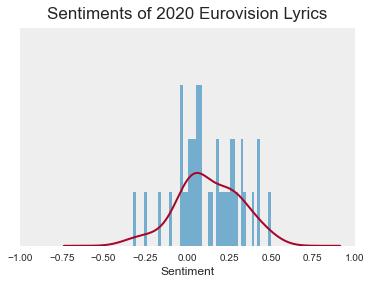

In [52]:
fig, ax = plt.subplots(figsize=(6,4))
#define histograms and kde
df_2020["sentiment"].plot(kind="hist", density=True, bins=50, alpha=0.65)
df_2020["sentiment"].plot(kind="kde")

#Appearance Settings
ax.set_xlabel("Sentiment")
ax.set_xlim(-1, 1)
ax.set_ylim(0,6)
ax.set_yticks([])
ax.set_ylabel("")
ax.set_title("Sentiments of 2020 Eurovision Lyrics", size=17, pad=10)
ax.tick_params(left=False, bottom=False)
plt.style.use("bmh")
ax.grid(False)
for ax, spine in ax.spines.items():
  spine.set_visible(False)


Word frequency analysis for the 2020 contest

Find unique words for each set of lyrics

In [53]:
#Stores unique words of each lyrics song into a new column called words
#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df_2020 = df_2020.reset_index(drop=True)
for word in df_2020['Lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
#create the new column with the information of words lists
df_2020['words'] = words
df_2020.head()

Artist            Song  \
0   The Mamas            Move   
1         VAL        Da vidna   
2   Montaigne  Don't Break Me   
3       Vasil             You   
4  Ana Soklic            Voda   

                                              Lyrics  \
0  we try we fight we fall it's alright that's li...   
1  заплятала восень ясну косамі ды распляла заплу...   
2  i don't feel the same buzz when your name come...   
3  hand on my hand fingertips trembling this feel...   
4  greva naprej v novi čas zbeživa od tu daleč st...   

                                  Lyrics translation  sentiment  \
0  we try we fight we fall it's alright that's li...   0.325397   
1  braided autumn with clear braids and unraveled...   0.058152   
2  i don't feel the same buzz when your name come...   0.035556   
3  hand on my hand fingertips trembling this feel...   0.082143   
4  let's move on to a new time let's run away fro...   0.143561   

                                               words  
0  [try, fight, fall, alright, thats, life, oh, w...  
1  [заплятала, восень, ясну, косамі, ды, распляла...  
2  [feel, buzz, name, come, phone, anymore, like,...  
3  [hand, fingertip, trembling, feeling, cant, un...  
4  [greva, naprej, v, novi, čas, zbeživa, od, tu,...

Find the word frequencies

In [54]:
#Create a data_frame of words used per decade
stop_words.append("pre")
set_words = []
set_year = []
for i in df_2020.index:
  for word in df_2020['words'].loc[i]:
    if word == 'lamour':
      set_words.append('amour') #replace l'amour with amour
    else:
      set_words.append(word)
    set_year.append(2020)
words_df = pd.DataFrame({'words':set_words, 'year':set_year})

#Count the word frequencies per decade and place them into a list of datasets per decade
cv = CountVectorizer(stop_words = stop_words)
text_cv = cv.fit_transform(words_df['words'])
data_cv = pd.DataFrame(text_cv.toarray(), columns=cv.get_feature_names())
data_cv['year'] = words_df['year']
vect_words = data_cv.groupby('year').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns = {'index':'words'})
vect_words = vect_words.rename_axis(columns='')
vect_words = vect_words[['words', 2020]]

C:\Users\aless\anaconda3new\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['printr', 'δι', 'ἀλλ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Plot the wordcloud

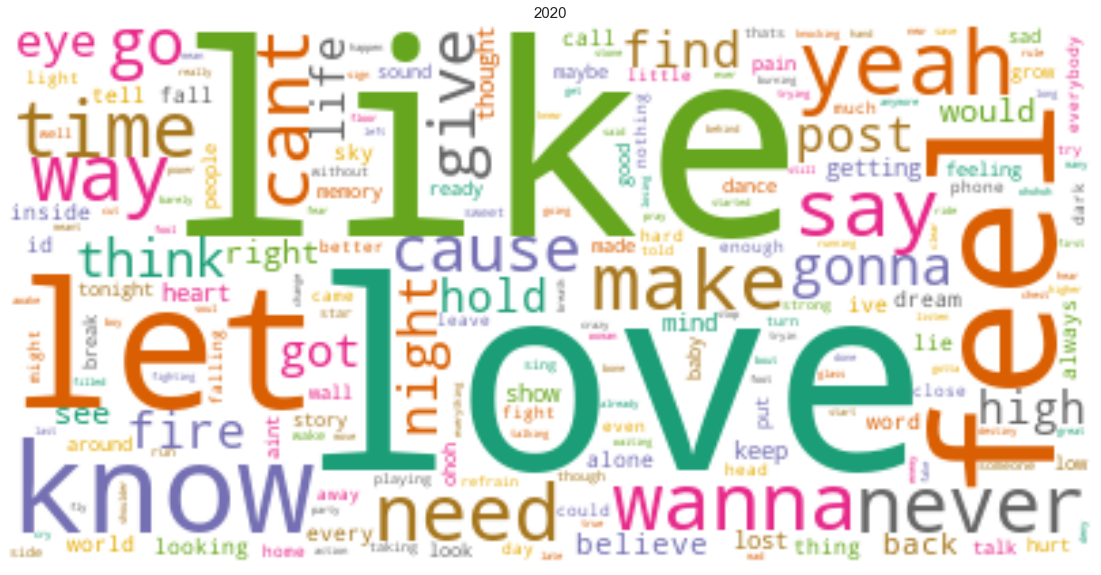

In [55]:
plot_wordcloud(vect_words)

In [ ]:
df_2020.to_json("Eurovision2020.json")

In [34]:
Artist = ["Anxhela Peristeri", "Montaigne", "Vincent Bueno", "Efendi", "Hooverphonic", "Victoria", "Albina", "Elena Tsagrinou", "Benny Christo", "Fyr Og Flamme", "Uku Suviste", "Blind Channel", "Barbara Pravi", "Tornike Kipiani", "Jendrik", "Stefania", "Daði & Gagnamagnið", "Lesley Roy", "Eden Alene", "MÃ¥neskin", "Samanta Tīna", "The Roop", "Destinty", "Natalia Gordienko", "Vasil", "TIX", "RAFAÅ", "The Black Mamba", "Roxen", "Manizha", "Senhit", "Hurricane", "Ana SokliÄ", "Blas CantÃ", "Tusse", "Gjon's Tears", "Jeangu Macrooy", "Go_A", "James Newman"]
Song = ["Karma", "Technicolour", "Amen", "Mata Hari", "The Wrong Place", "Growing Up Is Getting Old", "Tick-Tock", "El Diablo", "omaga", "Øve Os På Hinanden", "The Lucky One", "Dark Side", "VoilÃ ", "You", "I don't feel hate", "Last Dance", "10 Years", "MAPS", "Set me Free", "Zitti E Buoni", "The Moon Is Rising", "Discoteque", "Je Me Casse", "SUGAR", "Here I Stand", "Fallen Angel", "The Ride", "Love Is On My Side", "Amnesia", "Russian Woman", "Adrenalina", "Loco Loco", "Amen", "Voy A Quedarme", "Voices", "Tout l'Univers", "Birth of a New Age", "Shum", "Emberso"]
Lyrics = []
for a, s in zip(Artist, Song):
  song = genius.search_song(s, a)
  Lyrics.append(song.lyrics)

df_2021 = pd.DataFrame(Artist, columns = ["Artist"])
df_2021["Song"] = Song
df_2021["Lyrics"] = Lyrics
df_2021

Searching for "Karma" by Anxhela Peristeri...
Done.
Searching for "Technicolour" by Montaigne...
Done.
Searching for "Amen" by Vincent Bueno...
Done.
Searching for "Mata Hari" by Efendi...
Done.
Searching for "The Wrong Place" by Hooverphonic...
Done.
Searching for "Growing Up Is Getting Old" by Victoria...
Done.
Searching for "Tick-Tock" by Albina...
Done.
Searching for "El Diablo" by Elena Tsagrinou...
Done.
Searching for "omaga" by Benny Christo...
Done.
Searching for "Øve Os På Hinanden" by Fyr Og Flamme...
Done.
Searching for "The Lucky One" by Uku Suviste...
Done.
Searching for "Dark Side" by Blind Channel...
Done.
Searching for "VoilÃ " by Barbara Pravi...
Done.
Searching for "You" by Tornike Kipiani...
Done.
Searching for "I don't feel hate" by Jendrik...
Done.
Searching for "Last Dance" by Stefania...
Done.
Searching for "10 Years" by Daði & Gagnamagnið...
Done.
Searching for "MAPS" by Lesley Roy...
Done.
Searching for "Set me Free" by Eden Alene...
Done.
Searching for "Zitti 

Artist                       Song  \
0    Anxhela Peristeri                      Karma   
1            Montaigne               Technicolour   
2        Vincent Bueno                       Amen   
3               Efendi                  Mata Hari   
4         Hooverphonic            The Wrong Place   
5             Victoria  Growing Up Is Getting Old   
6               Albina                  Tick-Tock   
7      Elena Tsagrinou                  El Diablo   
8        Benny Christo                      omaga   
9        Fyr Og Flamme         Øve Os På Hinanden   
10         Uku Suviste              The Lucky One   
11       Blind Channel                  Dark Side   
12       Barbara Pravi                     VoilÃ    
13     Tornike Kipiani                        You   
14             Jendrik          I don't feel hate   
15            Stefania                 Last Dance   
16  Daði & Gagnamagnið                   10 Years   
17          Lesley Roy                       MAPS   
18          Eden Alene                Set me Free   
19           MÃ¥neskin              Zitti E Buoni   
20        Samanta Tīna         The Moon Is Rising   
21            The Roop                 Discoteque   
22            Destinty                Je Me Casse   
23   Natalia Gordienko                      SUGAR   
24               Vasil               Here I Stand   
25                 TIX               Fallen Angel   
26               RAFAÅ                   The Ride   
27     The Black Mamba         Love Is On My Side   
28               Roxen                    Amnesia   
29             Manizha              Russian Woman   
30              Senhit                 Adrenalina   
31           Hurricane                  Loco Loco   
32          Ana SokliÄ                       Amen   
33          Blas CantÃ             Voy A Quedarme   
34               Tusse                     Voices   
35        Gjon's Tears             Tout l'Univers   
36      Jeangu Macrooy         Birth of a New Age   
37                Go_A                       Shum   
38        James Newman                    Emberso   

                                               Lyrics  
0   [Teksti i "Karma"]\n\n[Intro]\nZoti nuk ma fal...  
1   [Verse 1]\nI wanna be close to my mother\nI wa...  
2   [Verse 1]\nAmen, I guess\nYou said that it's t...  
3   [Intro]\nMata Hari\n\n[Verse 1]\nI'm a godless...  
4   [Verse 1]\nI wake up and I think I could use a...  
5   [Verse 1]\nPlaying Tetris with my feelings\nTr...  
6   [Verse]\nTry to fix the broken pieces, now I'm...  
7   [Intro]\nI fell in love, I fell in love\nI gav...  
8   [Intro]\nHonestly, I don't care\nI'm happy you...  
9   [Vers 1: Jesper Groth]\nTiden er gået i stå\nH...  
10  [Verse 1]\nWonder if it ever crossed your mind...  
11  [Chorus]\nPut your middle fingers up\nTake a s...  
12  [Paroles de "Voilà"]\n\n[Couplet 1]\nÉcoutez-m...  
13  [Verse 1]\nSunshine, I wanna touch you\nWind b...  
14  [Chorus]\nI don't feel hate\nI just feel sorry...  
15  [Verse 1]\nMy heart was born a radical\nElectr...  
16  [Verse 1]\nWe've been together for a decade no...  
17  [Verse 1]\nI'm gonna let down all the armor\nL...  
18  [Intro]\nTake a look what we've become, it's b...  
19  [Testo di "ZITTI E BUONI"]\n\n[Strofa 1]\nLoro...  
20  [Intro]\nThe queen of the night is coming\nThe...  
21  [Intro]\nOkay, I feel the rhythm\nSomething's ...  
22  [Verse 1]\nBabe, are you hurtin'?\nAre you alr...  
23  [Verse 1]\nI can't explain it but there's some...  
24  [Verse]\nThere are times when I remember back\...  
25  [Verse 1]\nWhat can I say?\nI can't make her s...  
26  [Verse 1]\nLights, beating down a rainy street...  
27  [Verse 1]\nLeft home when I was only sweet six...  
28  [Verse 1]\nOnce upon a time I used to know a g...  
29  [Текст песни «RUSSIAN WOMAN»]\n\n[Интро]\nЭй, ...  
30  [Verse 1: Senhit]\nI'm burning up with afflict...  
31  [Tekst pesme "Loco Loco"]\n\n[Uvod]\nRam-ba-ba...  
32  [Verse 1]\nHey child\nWhy ya hidin' from th

In [35]:
df_2021 = clean_lyrics(df_2021, "Lyrics")
df_2021

Artist                       Song  \
0    Anxhela Peristeri                      Karma   
1            Montaigne               Technicolour   
2        Vincent Bueno                       Amen   
3               Efendi                  Mata Hari   
4         Hooverphonic            The Wrong Place   
5             Victoria  Growing Up Is Getting Old   
6               Albina                  Tick-Tock   
7      Elena Tsagrinou                  El Diablo   
8        Benny Christo                      omaga   
9        Fyr Og Flamme         Øve Os På Hinanden   
10         Uku Suviste              The Lucky One   
11       Blind Channel                  Dark Side   
12       Barbara Pravi                     VoilÃ    
13     Tornike Kipiani                        You   
14             Jendrik          I don't feel hate   
15            Stefania                 Last Dance   
16  Daði & Gagnamagnið                   10 Years   
17          Lesley Roy                       MAPS   
18          Eden Alene                Set me Free   
19           MÃ¥neskin              Zitti E Buoni   
20        Samanta Tīna         The Moon Is Rising   
21            The Roop                 Discoteque   
22            Destinty                Je Me Casse   
23   Natalia Gordienko                      SUGAR   
24               Vasil               Here I Stand   
25                 TIX               Fallen Angel   
26               RAFAÅ                   The Ride   
27     The Black Mamba         Love Is On My Side   
28               Roxen                    Amnesia   
29             Manizha              Russian Woman   
30              Senhit                 Adrenalina   
31           Hurricane                  Loco Loco   
32          Ana SokliÄ                       Amen   
33          Blas CantÃ             Voy A Quedarme   
34               Tusse                     Voices   
35        Gjon's Tears             Tout l'Univers   
36      Jeangu Macrooy         Birth of a New Age   
37                Go_A                       Shum   
38        James Newman                    Emberso   

                                               Lyrics  
0   teksti i karma   zoti nuk ma fal   jeta si në ...  
1   i wanna be close to my mother i wanna belong t...  
2   amen i guess you said that it's time for us to...  
3   mata hari   i'm a godless spy i'ma spy i uncov...  
4   i wake up and i think i could use another drin...  
5   playing tetris with my feelings tryna keep the...  
6   verse try to fix the broken pieces now i'm lea...  
7   i fell in love i fell in love i gave my heart ...  
8   honestly i don't care i'm happy you're here i'...  
9   vers  jesper groth tiden er gået i stå hva' er...  
10  wonder if it ever crossed your mind that what ...  
11  put your middle fingers up take a shot throw i...  
12  paroles de voilà  couplet  écoutezmoi moi la c...  
13  sunshine i wanna touch you wind blow i wanna s...  
14  i don't feel hate i just feel sorry you feel s...  
15  my heart was born a radical electric and dynam...  
16  we've been together for a decade now still eve...  
17  i'm gonna let down all the armor let out the p...  
18  take a look what we've become it's been so lon...  
19  testo di zitti e buoni  strofa  loro non sanno...  
20  the queen of the night is coming the blood moo...  
21  okay i feel the rhythm something's going on he...  
22  babe are you hurtin' are you alright you look ...  
23  i can't explain it but there's something going...  
24  verse there are times when i remember back wis...  
25  what can i say i can't make her stay when i kn...  
26  lights beating down a rainy street all the fac...  
27  left home when i was only sweet sixteen chasin...  
28  once upon a time i used to know a girl ripped ...  
29  текст песни russian woman  интро эй ха а а а э...  
30  senhit i'm burning up with affliction come gim...  
31  tekst pesme loco loco  uvod rambabam a ja slat...  
32  hey child why ya hidin' from the light why 

In [37]:
#Create lists to store the different translations
Lyrics_Translation = []
#Initialize the model
#Iterate for each row of lyrics and append the scores
for i in df_2021.index:
  blob = TextBlob(df_2021['Lyrics'].iloc[i])
  try:
    translation = blob.translate(to='en')
  except:
    translation = df_2021['Lyrics'].iloc[i]
  Lyrics_Translation.append("".join(translation))
#Create 4 columns to the main data frame  for each score
df_2021['Lyrics translation'] = Lyrics_Translation
df_2021

Artist                       Song  \
0    Anxhela Peristeri                      Karma   
1            Montaigne               Technicolour   
2        Vincent Bueno                       Amen   
3               Efendi                  Mata Hari   
4         Hooverphonic            The Wrong Place   
5             Victoria  Growing Up Is Getting Old   
6               Albina                  Tick-Tock   
7      Elena Tsagrinou                  El Diablo   
8        Benny Christo                      omaga   
9        Fyr Og Flamme         Øve Os På Hinanden   
10         Uku Suviste              The Lucky One   
11       Blind Channel                  Dark Side   
12       Barbara Pravi                     VoilÃ    
13     Tornike Kipiani                        You   
14             Jendrik          I don't feel hate   
15            Stefania                 Last Dance   
16  Daði & Gagnamagnið                   10 Years   
17          Lesley Roy                       MAPS   
18          Eden Alene                Set me Free   
19           MÃ¥neskin              Zitti E Buoni   
20        Samanta Tīna         The Moon Is Rising   
21            The Roop                 Discoteque   
22            Destinty                Je Me Casse   
23   Natalia Gordienko                      SUGAR   
24               Vasil               Here I Stand   
25                 TIX               Fallen Angel   
26               RAFAÅ                   The Ride   
27     The Black Mamba         Love Is On My Side   
28               Roxen                    Amnesia   
29             Manizha              Russian Woman   
30              Senhit                 Adrenalina   
31           Hurricane                  Loco Loco   
32          Ana SokliÄ                       Amen   
33          Blas CantÃ             Voy A Quedarme   
34               Tusse                     Voices   
35        Gjon's Tears             Tout l'Univers   
36      Jeangu Macrooy         Birth of a New Age   
37                Go_A                       Shum   
38        James Newman                    Emberso   

                                               Lyrics  \
0   teksti i karma   zoti nuk ma fal   jeta si në ...   
1   i wanna be close to my mother i wanna belong t...   
2   amen i guess you said that it's time for us to...   
3   mata hari   i'm a godless spy i'ma spy i uncov...   
4   i wake up and i think i could use another drin...   
5   playing tetris with my feelings tryna keep the...   
6   verse try to fix the broken pieces now i'm lea...   
7   i fell in love i fell in love i gave my heart ...   
8   honestly i don't care i'm happy you're here i'...   
9   vers  jesper groth tiden er gået i stå hva' er...   
10  wonder if it ever crossed your mind that what ...   
11  put your middle fingers up take a shot throw i...   
12  paroles de voilà  couplet  écoutezmoi moi la c...   
13  sunshine i wanna touch you wind blow i wanna s...   
14  i don't feel hate i just feel sorry you feel s...   
15  my heart was born a radical electric and dynam...   
16  we've been together for a decade now still eve...   
17  i'm gonna let down all the armor let out the p...   
18  take a look what we've become it's been so lon...   
19  testo di zitti e buoni  strofa  loro non sanno...   
20  the queen of the night is coming the blood moo...   
21  okay i feel the rhythm something's going on he...   
22  babe are you hurtin' are you alright you look ...   
23  i can't explain it but there's something going...   
24  verse there are times when i remember back wis...   
25  what can i say i can't make her stay when i kn...   
26  lights beating down a rainy street all the fac...   
27  left home when i was only sweet sixteen chasin...   
28  once upon a time i used to know a girl ripped ...   
29  текст песни russian woman  интро эй ха а а а э...   
30  senhit i'm burning up with affliction come gim...   
31  tekst pesme loco loco  uvod rambabam a ja slat...   
32  hey child 

In [38]:
#Create lists to store the different scores for each word
sentiment = []
#Initialize the model
#Iterate for each row of lyrics and append the scores
for i in df_2021.index:
  blob = TextBlob(df_2021['Lyrics translation'].iloc[i])
  sentiment.append(blob.sentiment[0])
#Create a column to the main data frame for each score
df_2021['sentiment'] = sentiment
df_2021

Artist                       Song  \
0    Anxhela Peristeri                      Karma   
1            Montaigne               Technicolour   
2        Vincent Bueno                       Amen   
3               Efendi                  Mata Hari   
4         Hooverphonic            The Wrong Place   
5             Victoria  Growing Up Is Getting Old   
6               Albina                  Tick-Tock   
7      Elena Tsagrinou                  El Diablo   
8        Benny Christo                      omaga   
9        Fyr Og Flamme         Øve Os På Hinanden   
10         Uku Suviste              The Lucky One   
11       Blind Channel                  Dark Side   
12       Barbara Pravi                     VoilÃ    
13     Tornike Kipiani                        You   
14             Jendrik          I don't feel hate   
15            Stefania                 Last Dance   
16  Daði & Gagnamagnið                   10 Years   
17          Lesley Roy                       MAPS   
18          Eden Alene                Set me Free   
19           MÃ¥neskin              Zitti E Buoni   
20        Samanta Tīna         The Moon Is Rising   
21            The Roop                 Discoteque   
22            Destinty                Je Me Casse   
23   Natalia Gordienko                      SUGAR   
24               Vasil               Here I Stand   
25                 TIX               Fallen Angel   
26               RAFAÅ                   The Ride   
27     The Black Mamba         Love Is On My Side   
28               Roxen                    Amnesia   
29             Manizha              Russian Woman   
30              Senhit                 Adrenalina   
31           Hurricane                  Loco Loco   
32          Ana SokliÄ                       Amen   
33          Blas CantÃ             Voy A Quedarme   
34               Tusse                     Voices   
35        Gjon's Tears             Tout l'Univers   
36      Jeangu Macrooy         Birth of a New Age   
37                Go_A                       Shum   
38        James Newman                    Emberso   

                                               Lyrics  \
0   teksti i karma   zoti nuk ma fal   jeta si në ...   
1   i wanna be close to my mother i wanna belong t...   
2   amen i guess you said that it's time for us to...   
3   mata hari   i'm a godless spy i'ma spy i uncov...   
4   i wake up and i think i could use another drin...   
5   playing tetris with my feelings tryna keep the...   
6   verse try to fix the broken pieces now i'm lea...   
7   i fell in love i fell in love i gave my heart ...   
8   honestly i don't care i'm happy you're here i'...   
9   vers  jesper groth tiden er gået i stå hva' er...   
10  wonder if it ever crossed your mind that what ...   
11  put your middle fingers up take a shot throw i...   
12  paroles de voilà  couplet  écoutezmoi moi la c...   
13  sunshine i wanna touch you wind blow i wanna s...   
14  i don't feel hate i just feel sorry you feel s...   
15  my heart was born a radical electric and dynam...   
16  we've been together for a decade now still eve...   
17  i'm gonna let down all the armor let out the p...   
18  take a look what we've become it's been so lon...   
19  testo di zitti e buoni  strofa  loro non sanno...   
20  the queen of the night is coming the blood moo...   
21  okay i feel the rhythm something's going on he...   
22  babe are you hurtin' are you alright you look ...   
23  i can't explain it but there's something going...   
24  verse there are times when i remember back wis...   
25  what can i say i can't make her stay when i kn...   
26  lights beating down a rainy street all the fac...   
27  left home when i was only sweet sixteen chasin...   
28  once upon a time i used to know a girl ripped ...   
29  текст песни russian woman  интро эй ха а а а э...   
30  senhit i'm burning up with affliction come gim...   
31  tekst pesme loco loco  uvod rambabam a ja slat...   
32  hey child 

In [40]:
print(np.mean(df_2021['sentiment']))
print([round(np.mean(df_2021['sentiment'])-1.96*sem(df_2021['sentiment']),3), round(np.mean(df_2021['sentiment'])+1.96*sem(df_2021['sentiment']),3)])

0.08248458416297628
[0.02, 0.145]


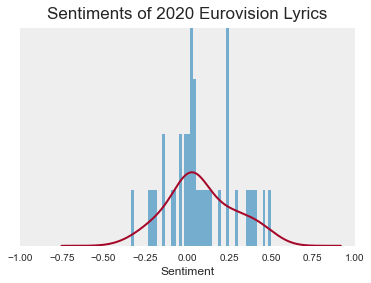

In [41]:
#Create an histogram with 2021 lyrics Sentiment
fig, ax = plt.subplots(figsize=(6,4))
#define histograms and kde
df_2021["sentiment"].plot(kind="hist", density=True, bins=50, alpha=0.65)
df_2021["sentiment"].plot(kind="kde")

#Appearance Settings
ax.set_xlabel("Sentiment")
ax.set_xlim(-1, 1)
ax.set_ylim(0,6)
ax.set_yticks([])
ax.set_ylabel("")
ax.set_title("Sentiments of 2020 Eurovision Lyrics", size=17, pad=10)
ax.tick_params(left=False, bottom=False)
plt.style.use("bmh")
ax.grid(False)
for ax, spine in ax.spines.items():
  spine.set_visible(False)

In [42]:
#Stores unique words of each lyrics song into a new column called words
#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df_2021 = df_2021.reset_index(drop=True)
for word in df_2021['Lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
#create the new column with the information of words lists
df_2021['words'] = words
df_2021.head()

Artist             Song  \
0  Anxhela Peristeri            Karma   
1          Montaigne     Technicolour   
2      Vincent Bueno             Amen   
3             Efendi        Mata Hari   
4       Hooverphonic  The Wrong Place   

                                              Lyrics  \
0  teksti i karma   zoti nuk ma fal   jeta si në ...   
1  i wanna be close to my mother i wanna belong t...   
2  amen i guess you said that it's time for us to...   
3  mata hari   i'm a godless spy i'ma spy i uncov...   
4  i wake up and i think i could use another drin...   

                                  Lyrics translation  sentiment  \
0  the text of karma god does not forgive me life...   0.008000   
1  i wanna be close to my mother i wanna belong t...  -0.200000   
2  amen i guess you said that it's time for us to...   0.033333   
3  mata hari   i'm a godless spy i'ma spy i uncov...  -0.233333   
4  i wake up and i think i could use another drin...  -0.141379   

                                               words  
0  [teksti, karma, zoti, nuk, fal, jeta, si, në, ...  
1  [wanna, close, mother, belong, world, mirror, ...  
2  [amen, guess, said, time, u, put, love, rest, ...  
3  [mata, hari, im, godless, spy, ima, uncover, s...  
4  [wake, think, could, use, another, drink, im, ...

In [57]:
#Create a data_frame of words used per decade
stop_words.append("pre")
set_words = []
set_year = []
for i in df_2021.index:
  for word in df_2021['words'].loc[i]:
    if word == 'lamour':
      set_words.append('amour') #replace l'amour with amour
    else:
      set_words.append(word)
    set_year.append(2021)
words_df = pd.DataFrame({'words':set_words, 'year':set_year})

#Count the word frequencies per decade and place them into a list of datasets per decade
cv = CountVectorizer(stop_words = stop_words)
text_cv = cv.fit_transform(words_df['words'])
data_cv = pd.DataFrame(text_cv.toarray(), columns=cv.get_feature_names())
data_cv['year'] = words_df['year']
vect_words = data_cv.groupby('year').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns = {'index':'words'})
vect_words = vect_words.rename_axis(columns='')
vect_words = vect_words[['words', 2021]]

C:\Users\aless\anaconda3new\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['printr', 'δι', 'ἀλλ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


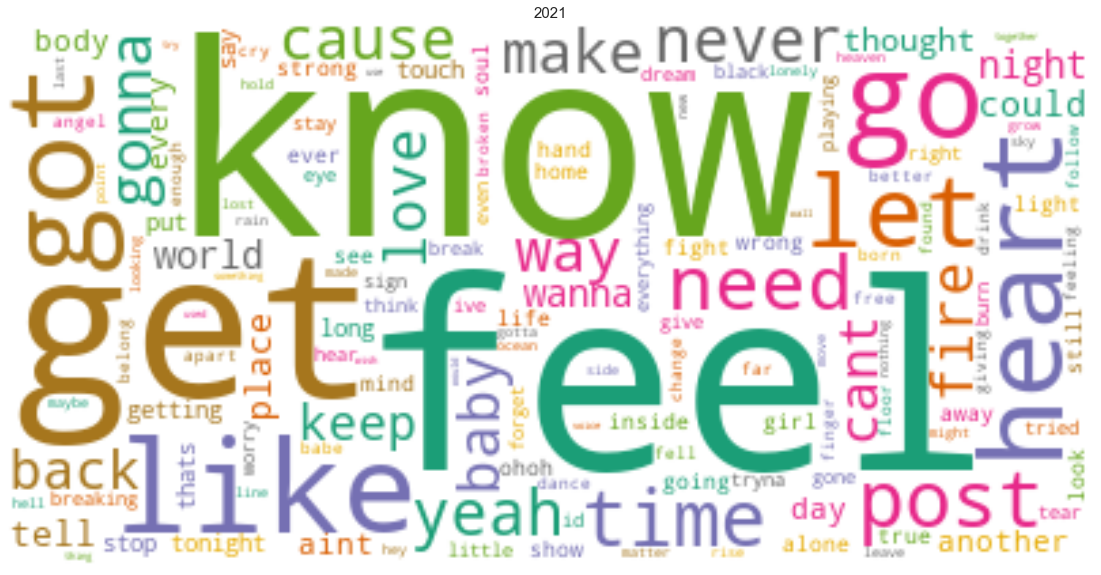

In [58]:
plot_wordcloud(vect_words)